In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Data

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(xTrainSet, yTrainSet),(xTest, yTest) = fashion_mnist.load_data()

In [5]:
xTrainSet.shape, yTrainSet.shape, xTest.shape, yTest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


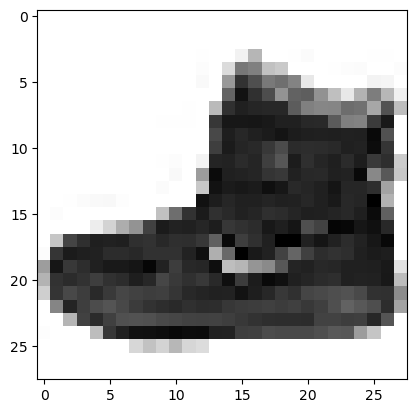

In [6]:
i = 0
print(yTrainSet[i])
plt.imshow(xTrainSet[i], cmap='binary')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

xTrain, xValid, yTrain, yValid = train_test_split(xTrainSet, yTrainSet, random_state=1)

In [8]:
xTrain = xTrain / 255.0
xValid = xValid / 255.0
xTest = xTest /255

Build Model

In [9]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [10]:
model= Sequential([
    Flatten(input_shape=xTrain.shape[1:]),
    Dense(units=300, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Train

In [13]:
train = model.fit(xTrain, yTrain, epochs=20, validation_data=(xValid, yValid))

Epoch 1/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.7858 - accuracy: 0.7416 - val_loss: 0.6317 - val_accuracy: 0.7839
Epoch 2/20
1407/1407 [==============================] - 1s 988us/step - loss: 0.5013 - accuracy: 0.8244 - val_loss: 0.5062 - val_accuracy: 0.8190
Epoch 3/20
1407/1407 [==============================] - 1s 955us/step - loss: 0.4493 - accuracy: 0.8408 - val_loss: 0.4682 - val_accuracy: 0.8338
Epoch 4/20
1407/1407 [==============================] - 1s 1ms/step - loss: 0.4179 - accuracy: 0.8530 - val_loss: 0.4253 - val_accuracy: 0.8485
Epoch 5/20
1407/1407 [==============================] - 1s 990us/step - loss: 0.3953 - accuracy: 0.8607 - val_loss: 0.9948 - val_accuracy: 0.6657
Epoch 6/20
1407/1407 [==============================] - 1s 968us/step - loss: 0.3761 - accuracy: 0.8664 - val_loss: 0.6309 - val_accuracy: 0.7977
Epoch 7/20
1407/1407 [==============================] - 1s 921us/step - loss: 0.3586 - accuracy: 0.8719 - val_loss: 0.3883 - val

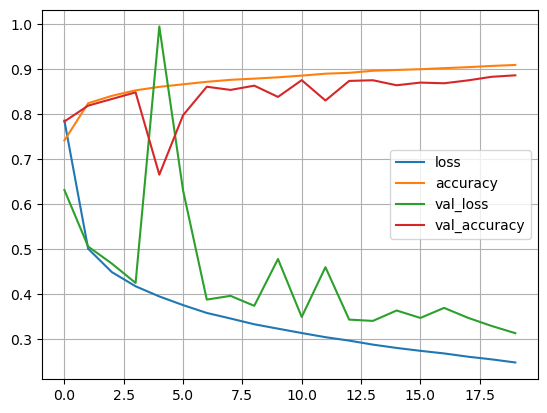

In [14]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

Evaluate

In [15]:
model.evaluate(xTest, yTest)

313/313 [==============================] - 0s 771us/step - loss: 0.3488 - accuracy: 0.8780


[0.34881994128227234, 0.878000020980835]

Predict

In [16]:
yProba = model.predict(xTest)
yProba[:3].round(2)

313/313 [==============================] - 0s 413us/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.07, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
yPred = np.argmax(yProba, axis=1)
yPred[:3]

array([9, 2, 1])

In [18]:
yTest[:3]

array([9, 2, 1], dtype=uint8)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yTest, yPred)

array([[813,   2,  17,  42,   2,   1, 111,   0,  12,   0],
       [  2, 968,   0,  22,   2,   0,   5,   0,   1,   0],
       [ 14,   1, 771,  20,  69,   0, 120,   0,   5,   0],
       [ 16,   8,   7, 920,  14,   1,  29,   0,   5,   0],
       [  0,   0, 108,  52, 749,   0,  85,   0,   6,   0],
       [  0,   0,   0,   1,   0, 958,   0,  30,   2,   9],
       [105,   1,  59,  37,  53,   0, 730,   0,  15,   0],
       [  0,   0,   0,   0,   0,  18,   0, 972,   0,  10],
       [  4,   1,   2,   6,   5,   3,   6,   5, 968,   0],
       [  0,   0,   0,   1,   0,  10,   1,  57,   0, 931]])